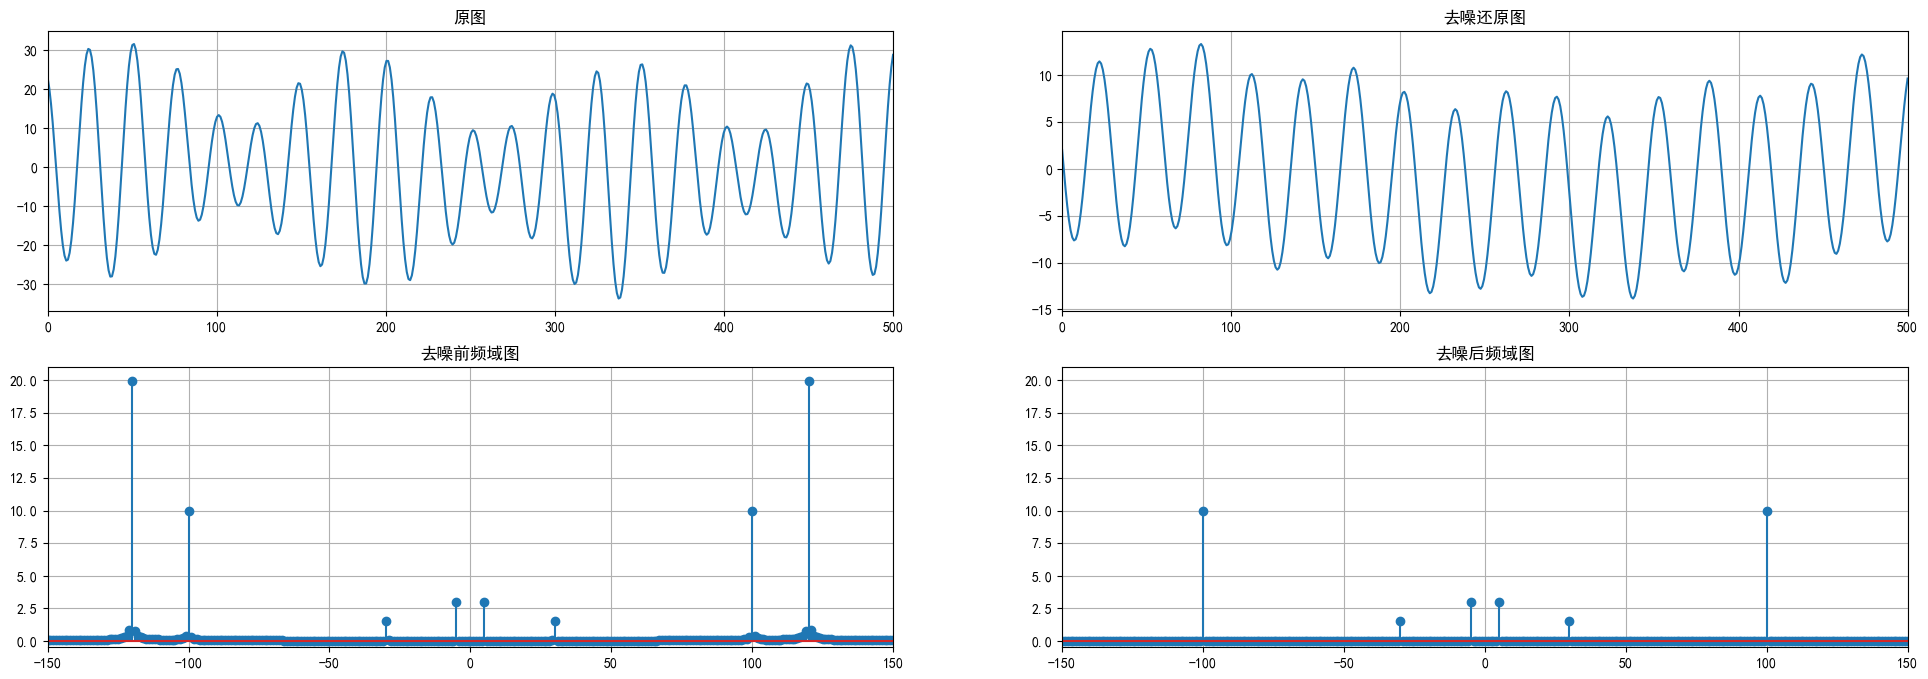

In [81]:
import numpy as np  # 导入 numpy 库，用于进行数学计算
import matplotlib.pyplot as plt  # 导入 matplotlib.pyplot 库，用于绘制图形
import math  # 导入 math 库，用于数学计算

# 定义一个函数，用于生成正弦波
def getSin(amp, freq, phase, sampleList):
    return amp * np.sin(-2 * math.pi * freq * sampleList + phase)

# 定义一个函数，用于生成余弦波
def getCos(amp, freq, phase, sampleList):
    return amp * np.cos(-2 * math.pi * freq * sampleList + phase)

#去噪函数
def denoise(arr,thresh):
    mask = arr > thresh
    mask = mask + 0
    return mask * arr

# 1. 获得混合波形
srate = 3000  # 设置采样率为 3000
t = np.linspace(0, 1, srate)  # 在 0 到 1 的范围内生成等间距的采样点

# 分别生成4个正余弦波
s1 = getSin(amp=1.5, freq=30, phase=0, sampleList=t)
s2 = getCos(amp=3, freq=5, phase=0, sampleList=t)
s3 = getSin(amp=10, freq=100, phase=0, sampleList=t)
s4 = getCos(amp=20, freq=120, phase=0, sampleList=t)

m = s1 + s2 + s3 + s4  # 将三个正弦波相加，得到混合波形
m2 = s1 + s2 + s3     #目标结果

# 2.获得傅里叶系数
#Please do not hand over the code to me directly. Please remove my name :liuzhe and change it to yours
fCoefs = np.fft.fft(m,srate)

# 3. 获得振幅列表：每一个绕线的重心到原点的距离
# 将傅里叶系数除以采样率，得到重心列表
# 然后再求
amp_list =2 * np.abs(fCoefs / srate)  #由于频率有负值，所以振幅被平分了，需要乘以2才能还原原始振幅

# 把频率轴从0~300 转变成 0~149 然后 -150~-1
freqs = np.fft.fftfreq(len(amp_list), 1/srate)

# 然后把 频率轴 和 数据 都变成 0hz 在中间，向左是负频率，向右是正频率的形式
amp_shifted=np.fft.fftshift(amp_list)
freq_shift=np.fft.fftshift(freqs)

# 绘制振幅列表
#优化前
fg ,ax = plt.subplots(2,2,figsize=(24,8))
ax[1,0].stem(freq_shift,amp_shifted)
ax[1,0].set_xlim([-150,150])
ax[1,0].set_ylim([-0.5,21])
ax[1,0].set_title('去噪前频域图') #优化前
ax[1,0].grid()  # 添加网格线


#去噪
amp_shifted = denoise(amp_shifted, 1)
#amp_shifted = np.where(np.logical_or(freq_shift > 110, freq_shift < -110), 0, amp_shifted)
amp_shifted[(freq_shift>110) | (freq_shift<-110)]=0  #去除频率大于110hz和小于-110hz的噪音


#还原傅里叶系数
#制造掩膜
am = np.fft.ifftshift(amp_shifted)
mask = am > 0

#傅里叶系数过滤
fCoefs_denoise = fCoefs * mask
#fCoefs_denoise = np.fft.ifft(fCoefs_denoise)

#去噪后，图像还原
m_denoise = np.fft.ifft(fCoefs_denoise)


#优化后
ax[1,1].stem(freq_shift,amp_shifted)
ax[1,1].set_xlim([-150,150])
ax[1,1].set_ylim([-0.5,21])
ax[1,1].set_title('去噪后频域图') #优化后
ax[1,1].grid()  # 添加网格线


# 绘制还原前后图像
X_limit = np.linspace(0, 500, 500)

#还原前图像
ax[0,0].plot(X_limit,m[:500])
ax[0,0].set_xlim([0,500])
ax[0,0].set_title("原图")
ax[0,0].grid()  # 添加网格线

#还原后图像
ax[0,1].plot(X_limit,np.real(m_denoise[:500]))
#ax[0,1].plot(X_limit,m2[:500])   #得出目标
ax[0,1].set_xlim([0,500])
ax[0,1].set_title("去噪还原图")
ax[0,1].grid()  # 添加网格线

#显示图形
plt.show()